## Importación librerias

In [696]:

import pandas as pd
import numpy as np


from IPython.display import display 





## Comprobación entorno
Terminal, Kernel y notebook mismo entorno


In [697]:
import sys, os
print(sys.executable)          
print(os.environ.get("VIRTUAL_ENV"))  


c:\Users\Propietario\Desktop\PROYECTO PYTHON FOR DATA\PROYECTO_EDA_PYTHON\.venv\Scripts\python.exe
C:\Users\Propietario\desktop\PROYECTO PYTHON FOR DATA\PROYECTO_EDA_PYTHON\.venv


##  1er. Dataset . Carga de datos. Información

In [698]:
df_customer = pd.read_excel("../Data/Raw/customer-details.xlsx")

Uno todas las hojas del Excell

In [699]:
df_customer = pd.concat(
    pd.read_excel("../Data/Raw/customer-details.xlsx", sheet_name=None).values(),
    ignore_index=True
)


In [700]:
df_customer. sample(10)

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
32691,3611,159822,0,0,2014-04-18,18,1420c51d-9b3d-4724-a78c-e3b783eb6077
23381,3266,82244,2,1,2013-06-20,4,6d2eebc9-fb8f-4605-9cc0-ae4fbf1b4e67
256,256,134847,0,2,2012-02-18,18,b7e08487-9d41-49d6-a641-06bd6641e1de
30969,1889,14628,0,1,2014-12-15,24,7957955f-632a-4d95-93a3-28fcd4b7ecb4
17337,17337,176936,2,0,2012-09-15,28,fae12d99-a929-4f72-ac5d-b4b52c42cd7d
11969,11969,79011,0,0,2012-08-21,10,612a4cb4-ac24-45f0-b989-983859ec4188
27774,7659,98757,0,1,2013-01-08,30,29107b18-a5a3-4a15-9b12-f2f88667037f
17603,17603,133443,1,0,2012-08-15,27,97f0e61a-68ca-40ae-bb87-04e81b4c9f11
19863,19863,155663,1,1,2012-03-18,18,90bc476a-3a00-4d41-9c07-e1bcd974be3d
25466,5351,43182,1,0,2013-01-29,27,b497f3e5-1c27-44f9-bf2b-2c458ea3369a


In [701]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43170 entries, 0 to 43169
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         43170 non-null  int64         
 1   Income             43170 non-null  int64         
 2   Kidhome            43170 non-null  int64         
 3   Teenhome           43170 non-null  int64         
 4   Dt_Customer        43170 non-null  datetime64[ns]
 5   NumWebVisitsMonth  43170 non-null  int64         
 6   ID                 43170 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ MB


# Columnas e información

0. Unnamed: 0 (int64)

No es una variable útil: se puede eliminar.

1. Income (int64)

Ingresos de la persona/cliente: análisis socioeconómico

2. Kidhome (int64)

Número de hijos pequeños en el hogar: variable numérica

3. Teenhome (int64)

Número de adolescentes en el hogar: variable numérica

4. Dt_Customer (datetime64[ns])

Fecha en la que el cliente se unió / fue registrado: antiguedad.

5. NumWebVisitsMonth (int64)

Número de visitas web al mes: comportamiento online.

6. ID (object)

Identificador único del cliente: clave primaria.

# * Pasos limpieza y transformación

1.	Eliminar Unnamed: 0.

2.	Revisar duplicados en ID.

3.	Distribución de Income: outliers, clientes con ingresos extremos.

4.	Distribución de Kidhome y Teenhome: hogares sin hijos, con hijos, etc.

5.	Antigüedad del cliente: calcular diferencia entre fecha actual y Dt_Customer.

6.	NumWebVisitsMonth: nº visitas.


# 1. Eliminar Unnamed

1. Ver todas las columnas
2. Quito cualquier columna que empiece por Unnamed
3. Confirmo resultado


In [702]:

print(df_customer.columns)

df_customer = df_customer.loc[:, ~df_customer.columns.str.contains('^Unnamed')]

print(df_customer.columns)



Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'NumWebVisitsMonth', 'ID'],
      dtype='object')
Index(['Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth',
       'ID'],
      dtype='object')


# 2. Revisar duplicados de id

1. Nº de IDs totales
2. Nº de IDs únicos
3. Nº de duplicados

In [703]:
total_ids = df_customer['ID'].shape[0]

unique_ids = df_customer['ID'].nunique()

duplicated_ids = total_ids - unique_ids

print("Total de registros:", total_ids)
print("IDs únicos:", unique_ids)
print("Duplicados:", duplicated_ids)


Total de registros: 43170
IDs únicos: 43170
Duplicados: 0


# 3. Distribución de Income

1. Aseguro tipo numérico y revisa nulos
2. Chequeos rápidos de calidad
3. Detección de outliers (regla IQR): No se detectan outliers en la variable Income según la regla IQR y percentiles (p01–p99). Se mantiene la variable sin modificaciones.
4. Umbrales percentil
5. Boxplot de Income

In [704]:
#1. Aseguro tipo numérico y reviso nulos
df_customer['Income'] = pd.to_numeric(df_customer['Income'], errors='coerce')

print(df_customer['Income'].dtype)
print('Nulos en Income:', df_customer['Income'].isna().sum())
df_customer['Income'].describe()


int64
Nulos en Income: 0


count     43170.000000
mean      93227.389622
std       50498.181989
min        5841.000000
25%       49608.000000
50%       93009.500000
75%      136740.500000
max      180802.000000
Name: Income, dtype: float64

In [705]:
# 2. Chequeos rápidos de calidad
print('<=0:', (df_customer['Income'] <= 0).sum())

df_customer['Income'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])


<=0: 0


0.25     49608.00
0.50     93009.50
0.75    136740.50
0.90    163197.40
0.95    172366.75
0.99    179057.00
Name: Income, dtype: float64

In [706]:
# 3. Detección de outliers (regla IQR)
q1 = df_customer['Income'].quantile(0.25)
q3 = df_customer['Income'].quantile(0.75)
iqr = q3 - q1
low  = q1 - 1.5*iqr
high = q3 + 1.5*iqr

df_customer['income_outlier_iqr'] = ~df_customer['Income'].between(low, high)
df_customer['income_outlier_iqr'].value_counts()


income_outlier_iqr
False    43170
Name: count, dtype: int64

In [707]:
# 4. Umbrales percentil
p01 = df_customer['Income'].quantile(0.01)
p99 = df_customer['Income'].quantile(0.99)




Realizo un boxplot income como verificación visual de la distribución y confirmación de que no existen outliers

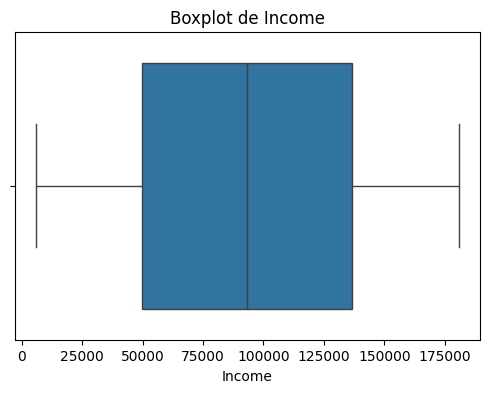

In [708]:
#5. Boxplot de income
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer['Income'])
plt.title('Boxplot de Income')
plt.show()





# 4. Distribución de Kidhome y Teenhome: hogares sin hijos, con hijos.
1. Importo Numpy
2. Conviero las columnas en nº enteros, errores en NaN.
3. Distribución y nulos
4. Total de hijos. Creo variable deribada.


In [709]:
# 2. Convierto en nº enteros, errores.

for c in ['Kidhome','Teenhome']:
    df_customer[c] = pd.to_numeric(df_customer[c], errors='coerce').astype('Int64')


In [710]:
# 3. Distribución básica y nulos

for c in ['Kidhome','Teenhome']:
    print(f"{c}  - nulos:", df_customer[c].isna().sum())
    print(df_customer[c].value_counts(dropna=False).sort_index(), "\n")

Kidhome  - nulos: 0
Kidhome
0    14270
1    14425
2    14475
Name: count, dtype: Int64 

Teenhome  - nulos: 0
Teenhome
0    14402
1    14425
2    14343
Name: count, dtype: Int64 



In [711]:
# 4. Total de hijos
df_customer['Children_total'] = (df_customer['Kidhome'] . fillna(0) +
                                                    df_customer['Teenhome'] . fillna(0)). astype ('int64')


Confirmo la creación de la columna =total children

In [712]:
df_customer. sample(20)


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,income_outlier_iqr,Children_total
17011,177171,0,2,2012-06-01,8,fa877154-42e0-4471-a959-13acdc60242d,False,2
32555,38323,2,2,2014-03-31,18,b1650583-5f86-4cfc-8124-14dce7138f07,False,4
26173,149301,2,1,2013-12-04,17,47a99983-d4cd-40cd-a7a4-8afd2f90e5b6,False,3
30987,55082,0,2,2014-06-02,25,b7673e9d-4ef1-4ddf-9ec8-d5f11d6e9b41,False,2
5989,104064,1,1,2012-08-25,31,3a9967cf-e3a0-4687-ae91-3510bde5ef8b,False,2
40034,19168,1,1,2014-03-18,26,3f1555d4-4f8d-4c4b-886c-2c7c51a801bc,False,2
14612,119960,0,2,2012-08-10,11,b1345972-9dee-4e5d-b8d3-c831d9d52ff6,False,2
4313,118686,0,1,2012-12-16,6,7e2e11d8-e102-4af9-abc7-c97470308ec8,False,1
41351,60944,2,1,2014-03-28,32,b7f4dad5-4b30-4ad1-abe7-cadbfece8277,False,3
36648,53128,2,1,2014-11-09,3,b5f4ac34-9b2a-46fb-883d-2558ee551339,False,3


Realizo un boxplot de la variable Children_total como verificación visual de la distribución y confirmación de que no existen outliers.

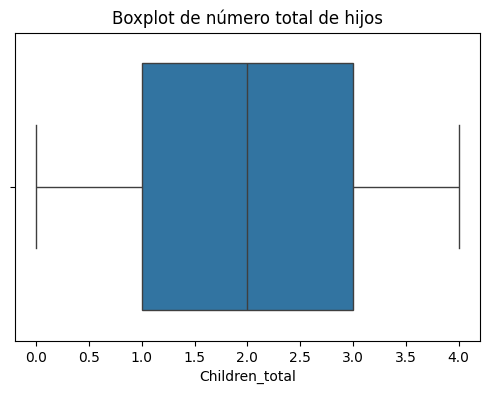

In [713]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer['Children_total'])
plt.title("Boxplot de número total de hijos")
plt.show()

# 5. Antiguedad del cliente. Creo columna.
1. Aseguro que la columna es tipo fecha
2. Fecha de referencia hoy
3. Creo columna con años antiguedad
4. Compruebo resultado

In [714]:
df_customer["Dt_Customer"] = pd.to_datetime(df_customer["Dt_Customer"], errors="coerce")   
ref_date = pd.Timestamp.today().normalize()
df_customer["Customer_Tenure_Years"] = ((ref_date - df_customer["Dt_Customer"]).dt.days // 365).astype("Int64")
df_customer[["Dt_Customer", "Customer_Tenure_Years"]].head()



,Dt_Customer,Customer_Tenure_Years
0,2012-04-04,13
1,2012-12-30,12
2,2012-02-02,13
3,2012-12-21,12
4,2012-06-20,13


In [715]:
df_customer. sample(20)

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID,income_outlier_iqr,Children_total,Customer_Tenure_Years
16817,165217,1,0,2012-02-02,23,2590331d-3c67-46f8-a283-7f020dfb1b97,False,1,13
12097,116142,2,2,2012-02-26,13,a92e1747-2b85-41cb-8a30-5a8e6241f2b1,False,4,13
12619,125953,1,0,2012-11-10,11,beb422d2-e101-4aa1-adaf-5e0ab82bee03,False,1,12
40468,106934,2,2,2014-02-17,13,8cc2e424-1c34-4c99-bacf-aecc3fa93ace,False,4,11
30904,53101,0,0,2014-06-28,21,7030a8bb-0c47-4790-8c3b-ea6f60d34e72,False,0,11
30673,78733,0,2,2014-01-08,4,e256a65c-4b59-4dd5-be1d-f39168d490dc,False,2,11
332,50728,2,0,2012-11-30,15,c9ca48b9-97cd-4b29-a1f3-95b5454e56a3,False,2,12
28937,154340,1,1,2013-07-03,12,52d353f9-1dc5-4a53-820c-1ffe5634ed0d,False,2,12
39680,25008,0,1,2014-08-20,21,4a66422e-c890-457b-a625-e5215e35f362,False,1,11
41414,27772,2,1,2014-04-15,29,2da7309b-ce71-4d90-acf9-9e22198b2579,False,3,11


# 6. Nº Visitas. Visualizo

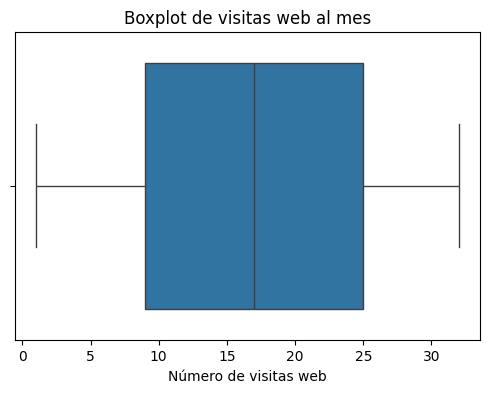

In [716]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df_customer["NumWebVisitsMonth"])
plt.title("Boxplot de visitas web al mes")
plt.xlabel("Número de visitas web")
plt.show()

# 2º Dataset. Carga de datos. información

In [717]:
df_bank = pd.read_csv("../Data/Raw/bank-additional.csv")

In [718]:
df_bank. sample(10)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
35574,35718,NaN,admin.,MARRIED,university.degree,0.0,1.0,0.0,cellular,74,2,999,0,NONEXISTENT,-1.8,"92,893","-46,2","1,244","5099,1",no,21-mayo-2016,46.338,-117.812,4b1ab18e-d06e-4398-87e7-507f4d819fa0
22304,22401,31.0,technician,SINGLE,university.degree,NaN,1.0,0.0,cellular,1123,2,999,0,NONEXISTENT,1.4,"93,444","-36,1","4,964","5228,1",yes,10-septiembre-2019,33.864,-88.646,551a0bba-4b27-4ef2-98df-a8ba78bb3fde
34339,34483,28.0,blue-collar,SINGLE,basic.9y,0.0,1.0,0.0,cellular,225,1,999,1,FAILURE,-1.8,"92,893","-46,2","1,266","5099,1",no,12-abril-2016,33.895,-114.364,b112beb4-d16a-4400-84f8-94f4071c6151
14409,14506,NaN,entrepreneur,MARRIED,basic.4y,0.0,0.0,0.0,cellular,103,4,999,0,NONEXISTENT,1.4,"93,918","-42,7",NaN,"5228,1",no,8-agosto-2017,43.853,-117.270,49ad3e80-dee9-4944-a495-d4487bbe344a
15376,15473,NaN,services,DIVORCED,basic.6y,NaN,0.0,0.0,telephone,744,4,999,0,NONEXISTENT,1.4,"93,918","-42,7","4,957","5228,1",no,21-julio-2019,39.262,-120.746,3dd18f77-bde8-42f8-8fa5-242df95de38a
17545,17642,58.0,technician,MARRIED,professional.course,0.0,0.0,1.0,telephone,76,18,999,0,NONEXISTENT,1.4,"93,918","-42,7","4,962","5228,1",no,14-noviembre-2017,43.575,-91.427,3030214e-a0a0-4cf3-af50-1362a61d2e2c
24561,24683,52.0,admin.,MARRIED,basic.4y,0.0,1.0,1.0,cellular,102,3,999,0,NONEXISTENT,-0.1,"93,2",-42,"4,191","5195,8",no,9-junio-2016,45.553,-82.369,f49f05b0-707c-49fd-8f28-ebead44ba378
2638,2735,39.0,blue-collar,MARRIED,basic.6y,0.0,0.0,0.0,telephone,488,12,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,23-febrero-2018,38.043,-71.918,c20bce65-1ab0-42d1-8bf4-bbd17e494b49
22307,22404,35.0,self-employed,MARRIED,basic.9y,0.0,1.0,0.0,cellular,57,4,999,0,NONEXISTENT,1.4,"93,444","-36,1","4,964","5228,1",no,2-diciembre-2018,36.360,-90.419,c67da5c1-e15d-4dbf-9707-548dd3447b9b
22871,22968,47.0,self-employed,MARRIED,university.degree,0.0,0.0,0.0,cellular,36,3,999,0,NONEXISTENT,1.4,"93,444","-36,1","4,965","5228,1",no,11-febrero-2017,30.231,-107.606,69eb5ab1-aee1-45a2-b537-fd7452c77074


In [719]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 
 17  euribor3m       33744 non-null 

## Visualizo toda la información, nulos y tipo de dato

In [720]:
resumen = pd.DataFrame({
    "Non-Null Count": df_bank.notna().sum(),
    "Null Count": df_bank.isna().sum(),
    "Dtype": df_bank.dtypes
})
print(resumen)


                Non-Null Count  Null Count    Dtype
Unnamed: 0               43000           0    int64
age                      37880        5120  float64
job                      42655         345   object
marital                  42915          85   object
education                41193        1807   object
default                  34019        8981  float64
housing                  41974        1026  float64
loan                     41974        1026  float64
contact                  43000           0   object
duration                 43000           0    int64
campaign                 43000           0    int64
pdays                    43000           0    int64
previous                 43000           0    int64
poutcome                 43000           0   object
emp.var.rate             43000           0  float64
cons.price.idx           42529         471   object
cons.conf.idx            43000           0   object
euribor3m                33744        9256   object
nr.employed 

# Columnas e información ( Hay datos incompletos)

0. Unnamed:  se puede eliminar

1. age (float64): edad de la persona.

2. job (object): profesión.

3. marital (object): estado civil.

4. education (object): educación.

5. default (float64): si el cliente tiene crédito con impago (posibles nulos).

6. housing (float64): si tiene préstamo hipotecario (posibles nulos).

7. loan (float64): si tiene préstamo personal (posibles nulos).

8. contact (object): tipo de contacto.

9. duration (int64): duración de la llamada/contacto en segundos. Covierto en minutos

10. campaign (int64):  número de veces que se ha contactado al cliente. No transformo, esta correcta.

11. pdays (int64): días desde el último contacto (999 significa que nunca se contactó). Transformo en "contacto" o "no contacto".

12. previous (int64): número de contactos anteriores. Dejo como esta.

13. poutcome (object): resultado de campaña de marketing anterior. Traduzco a español, 3 valores.

14. emp.var.rate (float64): indicador económico (tasa de variación del empleo).

15. cons.price.idx (object): indice de precios del consumidor. Reemplazo nulos por la madiana. Nulos 1.1%.

16. cons.conf.idx (object): indice de confianza del consumidor. Con los valores negativos transformo en "confianza media", "baja confianza" y "alta confianza"

17. euribor3m (object): tasa de interés euríbor a 3 meses.

18. nr.employed (object): número de empleados (indicador económico).

19. month (object): mes del último contacto de la campaña.

20. day_of_week (object): día de la semana del último contacto.

21. longitude (float64): localización geográfica.

22. id (object): identificador único del cliente.

23. y (object): variable objetivo (si el cliente contrató o no el producto/servicio).


# * Pasos limpieza y transformación (cuando este detallarlo bien)



Eliminar Unnamed: 0.

Revisar valores faltantes (default, housing, loan, marital, job).

Analizar la variable objetivo y (cuántos clientes aceptaron vs rechazaron)

Distribución de edad: ver segmentos más contactados.

Cruzar duración de llamadas (duration) con éxito (y).

Revisar variables económicas (euribor3m, emp.var.rate): ómo influyen en la respuesta.

Outliers en duración de llamadas y pdays.






# 1. Eliminamos columna Unnamed

In [721]:
df_bank = df_bank.drop(columns=["Unnamed: 0"])

# Comprobar columnas resultantes
print(df_bank.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'date', 'latitude', 'longitude', 'id_'],
      dtype='object')


# 2. Columna age, tenemos 12% aprox. de nulos. 
1. Visualizo: edades entre 30 y 50 años, mediana aprox. 40 años (38), de 18 a 20 años los más jóvenes, mayores apox 70 años. Hay clientes con edades entre los 70 y 100 años. 
2. Reemplazo nulos por la mediana

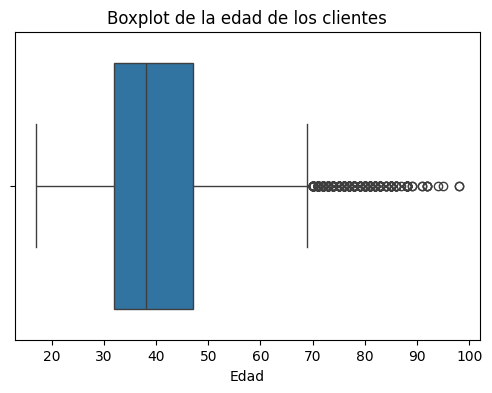

In [722]:
# Visualizo
plt.figure(figsize=(6,4))
sns.boxplot(x=df_bank["age"].dropna())
plt.title("Boxplot de la edad de los clientes")
plt.xlabel("Edad")
plt.show()

In [723]:
# Reemplazo nulos por mediana 38 años
# Calcular la mediana de la edad (ignorando nulos)
mediana_age = df_bank["age"].median()

# Rellenar los nulos con la mediana
df_bank["age"] = df_bank["age"].fillna(mediana_age)

# Compruebo que ya no hay nulos en la columna age
print("Nulos en edad después de imputar:", df_bank["age"].isna().sum())
print("Mediana usada:", mediana_age)


Nulos en edad después de imputar: 0
Mediana usada: 38.0


In [724]:
# visulizo la información de nuevo
resumen = pd.DataFrame({
    "Non-Null Count": df_bank.notna().sum(),
    "Null Count": df_bank.isna().sum(),
    "Dtype": df_bank.dtypes
})
print(resumen)


                Non-Null Count  Null Count    Dtype
age                      43000           0  float64
job                      42655         345   object
marital                  42915          85   object
education                41193        1807   object
default                  34019        8981  float64
housing                  41974        1026  float64
loan                     41974        1026  float64
contact                  43000           0   object
duration                 43000           0    int64
campaign                 43000           0    int64
pdays                    43000           0    int64
previous                 43000           0    int64
poutcome                 43000           0   object
emp.var.rate             43000           0  float64
cons.price.idx           42529         471   object
cons.conf.idx            43000           0   object
euribor3m                33744        9256   object
nr.employed              43000           0   object
y           

# 3. Columna job. Reemplazo nulos por "desconocido".  Convierto a español.

In [725]:
df_bank['job'] = df_bank['job'].fillna('desconocido')

# Traduzco a español
df_bank['job'] = df_bank['job'].replace({
    'housemaid': 'empleada hogar',
    'services': 'servicios',
    'admin.': 'administrativo',
    'blue-collar': 'obrero',
    'technician': 'técnico',
    'retired': 'jubilado',
    'management': 'directivo',
    'unemployed': 'desempleado',
    'self-employed': 'autónomo',
    'entrepreneur': 'emprendedor',
    'student': 'estudiante',
    'desconocido': 'desconocido'
})


#visualizo categorías únicas

print(df_bank['job'].unique())

['empleada hogar' 'servicios' 'administrativo' 'obrero' 'técnico'
 'jubilado' 'directivo' 'desempleado' 'autónomo' 'desconocido'
 'emprendedor' 'estudiante']


# 4. Columna Marital. Reemplazo nulos por "desconocido". Convierto todo en minúsculas y quito espacios

In [726]:
df_bank['marital'] = df_bank['marital'].fillna('desconocido').replace('', 'desconocido')

#visualizo categorías únicas

print(df_bank['marital'].unique())

# Covertimos en minúsculas y quitamos espacios al principio

df_bank['marital'] = df_bank['marital'].str.strip().str.lower()

# Traduzco a español
df_bank['marital'] = df_bank['marital'].replace({
    'married': 'casado',
    'single': 'soltero',
    'divorced': 'divorciado',
    'desconocido': 'desconocido'
})


# vuelvo a visualizar
print(df_bank['marital'].unique())



['MARRIED' 'SINGLE' 'DIVORCED' 'desconocido']
['casado' 'soltero' 'divorciado' 'desconocido']


# 5. Columna Education. Cambio nulos por "desconocido". Convertimos en minúsculas y quito espacios. Agrupo categorías

In [727]:
df_bank['education'] = df_bank['education'].str.strip().str.lower()

#cambio nulos por desconocido
df_bank['education'] = df_bank['education'].replace('', 'desconocido').fillna('desconocido')



#agrupo categorías

df_bank['education'] = df_bank['education'].replace({
    'basic.4y': 'basico',
    'basic.6y': 'basico',
    'basic.9y': 'basico',
    'high.school': 'secundaria',
    'university.degree': 'universidad',
    'professional.course': 'profesional',
    'illiterate': 'sin_estudios',
    'desconocido': 'desconocido'
})
#visualizo. Confirmo todo lo hecho anteriormente

print(df_bank['education'].unique())
df_bank.info()


['basico' 'secundaria' 'profesional' 'desconocido' 'universidad'
 'sin_estudios']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43000 non-null  float64
 1   job             43000 non-null  object 
 2   marital         43000 non-null  object 
 3   education       43000 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 

# 6. Columna default. Cambio los nulos por "desconocido". Convierto valores en string, elimino espacios y todo minuscula. Convierto en si, no o desconocido. 

In [728]:
# Reemplazamos nulos por desconocido
df_bank['default'] = df_bank['default'].fillna('desconocido')

# Convierto valores en string, eliminamos espacios en blanco y en minúscula

df_bank['default'] = df_bank['default'].astype(str).str.strip().str.lower()

# Convierto a objeto

df_bank['default'] = df_bank['default'].replace({
    '0.0': 'no',
    '1.0': 'sí',
    'desconocido': 'desconocido'
})

#reviso resultado
print(df_bank['default'].unique())
df_bank.info()

['no' 'desconocido' 'sí']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43000 non-null  float64
 1   job             43000 non-null  object 
 2   marital         43000 non-null  object 
 3   education       43000 non-null  object 
 4   default         43000 non-null  object 
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.em

# 7. Columna housing. Cambio nulos por "desconocido". Convierto valores en string, elimino espacios y minuscula. Convierto en si, no o desconocido.

In [729]:
# Cambio nulos por desconocido

df_bank['housing'] = df_bank['housing'].fillna('desconocido')

# Convierto valores en string, elimino espacios y minuscula

df_bank['housing'] = df_bank['housing'].astype(str).str.strip().str.lower()

# Convierto a objeto

df_bank['housing'] = df_bank['housing'].replace({
    '0.0': 'no',
    '1.0': 'sí',
    'desconocido': 'desconocido'
})
# visualizo

print(df_bank['housing'].unique())
df_bank.info()



['no' 'sí' 'desconocido']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43000 non-null  float64
 1   job             43000 non-null  object 
 2   marital         43000 non-null  object 
 3   education       43000 non-null  object 
 4   default         43000 non-null  object 
 5   housing         43000 non-null  object 
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.em

# 8. Columna loan. Cambio nulos por "desconocido". Convierto valores en string, elimino espacios y minuscula. Convierto en si, no o desconocido.

In [730]:
df_bank['loan'] = df_bank['loan'].fillna('desconocido')

# Convierto valores en string, elimino espacios y minuscula

df_bank['loan'] = df_bank['loan'].astype(str).str.strip().str.lower()

# Convierto a objeto

df_bank['loan'] = df_bank['loan'].replace({
    '0.0': 'no',
    '1.0': 'sí',
    'desconocido': 'desconocido'
})
# visualizo

print(df_bank['loan'].unique())
df_bank.info()

['no' 'sí' 'desconocido']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             43000 non-null  float64
 1   job             43000 non-null  object 
 2   marital         43000 non-null  object 
 3   education       43000 non-null  object 
 4   default         43000 non-null  object 
 5   housing         43000 non-null  object 
 6   loan            43000 non-null  object 
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.em

# 9. Columna contact, traduzco a español. No hay nulos.

In [731]:
df_bank['contact'] = df_bank['contact'].replace({
    'cellular': 'móvil',
    'telephone': 'teléfono fijo'
})

print(df_bank['contact'].unique())

['teléfono fijo' 'móvil']


# 10. Columna duration lo convierto en minutos.

In [732]:
# Convierto de segundos a minutos
df_bank['duration'] = (df_bank['duration'] / 60).round(2)

print(df_bank['duration'].head())

0    4.35
1    2.48
2    3.77
3    2.52
4    5.12
Name: duration, dtype: float64


# 11. Columna pdays, tenemos valores del 1 al 27 que es con contacto,  0 y 999 que entiendo que es sin contacto. Transformo columna en datos contacto o no contacto. 

In [733]:
# Transformamos la columna pdays en 'contacto' / 'no_contacto'
df_bank['pdays'] = df_bank['pdays'].apply(lambda x: 'no_contacto' if x in [0, 999] else 'contacto')

# Revisamos resultado
print(df_bank['pdays'].unique())
print(df_bank['pdays'].value_counts())


['no_contacto' 'contacto']
pdays
no_contacto    41427
contacto        1573
Name: count, dtype: int64


In [734]:
#Visualizo 
df_bank.sample(10)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
2772,41.0,técnico,casado,basico,no,sí,no,teléfono fijo,3.50,2,no_contacto,0,NONEXISTENT,1.1,"93,994","-36,4","4,859",5191,no,23-octubre-2015,44.555,-103.504,b4cf7440-5746-4cd6-b582-e2232802e3bc
42601,38.0,administrativo,casado,profesional,desconocido,sí,sí,móvil,1.17,1,no_contacto,0,NONEXISTENT,1.4,"93,444","-36,1",NaN,"5228,1",no,22-febrero-2019,46.601,-94.347,151d1304-9701-4b0c-8b22-ad4d083fb758
7427,38.0,obrero,casado,basico,desconocido,sí,no,teléfono fijo,3.77,2,no_contacto,0,NONEXISTENT,1.1,"93,994","-36,4","4,864",5191,no,19-junio-2016,38.051,-91.339,0585cf1f-a8be-4f58-88eb-28cd86ca1582
29574,37.0,servicios,divorciado,secundaria,desconocido,sí,no,móvil,6.15,3,no_contacto,0,NONEXISTENT,-1.8,"93,075","-47,1","1,405","5099,1",no,23-septiembre-2016,25.712,-78.047,73aed233-093b-4335-bd7d-3647ab4226f5
9054,40.0,administrativo,divorciado,basico,no,no,no,teléfono fijo,2.68,5,no_contacto,0,NONEXISTENT,1.4,"94,465","-41,8","4,967","5228,1",no,12-agosto-2017,33.166,-114.472,f9763a7a-2319-48ea-afdc-9dfc83961785
14772,38.0,servicios,casado,secundaria,no,sí,sí,móvil,2.95,1,no_contacto,0,NONEXISTENT,1.4,"93,918","-42,7","4,957","5228,1",no,15-diciembre-2017,30.489,-109.507,acaae9aa-1614-45fa-a05d-a9dadc68206d
24747,35.0,directivo,casado,basico,no,no,no,móvil,4.60,1,no_contacto,1,FAILURE,-0.1,"93,2",-42,"4,153","5195,8",no,17-noviembre-2018,40.737,-68.255,922468ad-a1a0-41c3-aa43-5c1d849a77d8
34105,33.0,obrero,casado,profesional,no,no,no,móvil,1.98,2,no_contacto,1,FAILURE,-1.8,"92,893","-46,2","1,266","5099,1",no,30-marzo-2018,26.644,-120.702,27b3c80e-e235-4321-b37b-4b10ccc65ca9
40801,65.0,jubilado,casado,basico,no,no,no,móvil,3.12,2,contacto,3,SUCCESS,-1.1,"94,601","-49,5","0,993","4963,6",yes,28-junio-2018,37.688,-102.048,a6a7c168-eaff-4399-a6a9-30d9e602c695
2700,41.0,técnico,casado,basico,no,no,no,teléfono fijo,5.85,1,no_contacto,0,NONEXISTENT,1.1,"93,994","-36,4","4,859",5191,no,11-julio-2016,40.547,-99.089,97569102-4401-4a1c-960b-dc1c652b3658


# 12. Columna poutcome, tenemos 3 valores. Traduzco.

In [735]:
# Normalizo a minusculas
df_bank['poutcome'] = df_bank['poutcome'].str.strip().str.lower()

df_bank['poutcome'] = df_bank['poutcome'].replace({
    'success': 'éxito',
    'failure': 'fracaso',
    'nonexistent': 'inexistente'
})

# Reviso resultado
print(df_bank['poutcome'].unique())
print(df_bank['poutcome'].value_counts())


['inexistente' 'fracaso' 'éxito']
poutcome
inexistente    37103
fracaso         4461
éxito           1436
Name: count, dtype: int64


# 13. Columna emp. var. rate, lo transformo en categorías de tendencia.

In [736]:
# Transformo
df_bank['emp.var.rate'] = df_bank['emp.var.rate'].apply(
    lambda x: 'caída empleo' if x < 0 else 'crecimiento empleo'
)


#Visualizo
df_bank.sample(10)


,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
35055,27.0,técnico,divorciado,desconocido,desconocido,no,no,móvil,3.07,4,no_contacto,0,inexistente,caída empleo,"92,893","-46,2","1,25","5099,1",no,4-enero-2017,34.032,-84.765,088e981a-874b-469b-b07f-cb508d90501c
17507,44.0,obrero,casado,desconocido,desconocido,no,no,móvil,1.97,2,no_contacto,0,inexistente,crecimiento empleo,"93,918","-42,7","4,962","5228,1",no,9-septiembre-2015,27.973,-73.638,a65b927f-9808-44ac-a586-3f55f7362ad4
33284,49.0,jubilado,casado,basico,desconocido,no,no,móvil,2.98,1,no_contacto,1,fracaso,caída empleo,"92,893","-46,2","1,291","5099,1",no,27-octubre-2017,34.854,-67.810,09b8bdde-3e8f-448a-baf9-7e464f3ae81a
33927,30.0,técnico,casado,basico,no,no,no,móvil,3.77,4,no_contacto,1,fracaso,caída empleo,"92,893","-46,2",NaN,"5099,1",no,18-diciembre-2015,33.732,-108.489,e20f7293-8e78-43fa-97b5-512160f87c4f
40630,58.0,administrativo,casado,secundaria,no,no,no,móvil,5.62,1,contacto,1,éxito,caída empleo,"94,199","-37,5",NaN,"4963,6",yes,2-abril-2016,42.421,-101.576,22d5dafc-987e-4b3a-96b3-aec4ed4a8386
22505,55.0,obrero,casado,basico,desconocido,no,no,móvil,6.42,6,no_contacto,0,inexistente,crecimiento empleo,"93,444","-36,1","4,964","5228,1",no,10-junio-2015,43.430,-124.183,f7f4645b-af5b-4ac9-abc6-49a67d65a8e4
4261,46.0,administrativo,casado,basico,no,no,no,teléfono fijo,4.12,2,no_contacto,0,inexistente,crecimiento empleo,"93,994","-36,4",NaN,5191,no,3-abril-2019,47.075,-110.733,b25b3a8f-325b-4076-934b-41793127053b
27695,34.0,técnico,casado,profesional,no,no,no,teléfono fijo,1.33,4,no_contacto,0,inexistente,caída empleo,"92,843",-50,"1,629","5099,1",no,15-enero-2018,25.349,-111.324,34694f2c-b9ef-4dd8-a4ef-56be72376537
6582,42.0,jubilado,casado,basico,desconocido,sí,no,teléfono fijo,3.30,3,no_contacto,0,inexistente,crecimiento empleo,"93,994","-36,4",NaN,5191,no,1-mayo-2018,38.460,-118.329,ab2defe4-bff1-417d-a283-12e8af3a2fe7
30755,29.0,administrativo,soltero,universidad,no,sí,no,móvil,1.15,1,no_contacto,0,inexistente,caída empleo,"92,893","-46,2","1,344","5099,1",no,17-febrero-2015,40.889,-118.459,4d16ab89-c4de-46f1-9e84-a73d3f4cd583


# 14. Columna cons.price.idx , primero cuento cada valor (nulos). Como nos da el 1.1% de nulos los reemplazo por la mediana

In [737]:
# Contar cuántos valores vacíos hay

print(df_bank['cons.price.idx'].value_counts(dropna=False))


cons.price.idx
93,994    7938
93,918    6937
92,893    5985
93,444    5349
94,465    4522
93,2      3731
93,075    2552
92,201     803
92,963     742
NaN        471
92,431     471
92,649     375
94,215     320
94,199     316
92,843     298
92,379     274
93,369     271
94,027     242
94,055     236
93,876     224
94,601     212
92,469     184
92,713     179
93,749     179
94,767     130
93,798      48
92,756      11
Name: count, dtype: int64


In [738]:
# Reemplazo comas por puntos y convierto a numérico
df_bank['cons.price.idx'] = df_bank['cons.price.idx'].astype(str).str.replace(',', '.')
df_bank['cons.price.idx'] = pd.to_numeric(df_bank['cons.price.idx'], errors='coerce')


# Calcular mediana
mediana_precio = df_bank['cons.price.idx'].median()

# Rellenar vacíos con la mediana
df_bank['cons.price.idx'] = df_bank['cons.price.idx'].fillna(mediana_precio)

# Revisar que ya no haya vacíos
print(df_bank['cons.price.idx'].isna().sum())


# verifico

# 1. Confirmo que ya no quedan vacíos
print("Nulos en cons.price.idx:", df_bank['cons.price.idx'].isna().sum())

# 2. Estadísticas descriptivas
print("\nEstadísticas de cons.price.idx:")
print(df_bank['cons.price.idx'].describe())

# 3. Valores únicos más frecuentes
print("\nValores más frecuentes:")
print(df_bank['cons.price.idx'].value_counts().head(10))



0
Nulos en cons.price.idx: 0

Estadísticas de cons.price.idx:
count    43000.000000
mean        93.576134
std          0.576652
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons.price.idx, dtype: float64

Valores más frecuentes:
cons.price.idx
93.994    7938
93.918    6937
92.893    5985
93.444    5349
94.465    4522
93.200    3731
93.075    2552
92.201     803
92.963     742
93.749     650
Name: count, dtype: int64


# 15. Columna cons.conf.idx, con los varoles - transformo en "confianza media", "baja confianza" y "alta confianza".

In [739]:
# Aseguro que los valores son numéricos (convertimos coma a punto si hace falta)
df_bank['cons.conf.idx'] = df_bank['cons.conf.idx'].astype(str).str.replace(',', '.')
df_bank['cons.conf.idx'] = pd.to_numeric(df_bank['cons.conf.idx'], errors='coerce')

# Transformo directamente en categorías
df_bank['cons.conf.idx'] = pd.qcut(df_bank['cons.conf.idx'], 
                                   q=3, 
                                   labels=['baja confianza', 'confianza media', 'alta confianza'])

# Reviso
print(df_bank['cons.conf.idx'].unique())
print(df_bank['cons.conf.idx'].value_counts(normalize=True) * 100)


['confianza media', 'baja confianza', 'alta confianza']
Categories (3, object): ['baja confianza' < 'confianza media' < 'alta confianza']
cons.conf.idx
confianza media    43.072093
baja confianza     37.904651
alta confianza     19.023256
Name: proportion, dtype: float64


In [740]:
df_bank.sample(10)

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
25311,29.0,directivo,soltero,universidad,no,no,no,móvil,1.03,1,no_contacto,0,inexistente,caída empleo,93.200,confianza media,"4,12","5195,8",no,1-enero-2015,36.680,-83.669,3661d058-45a7-41b5-8bf2-457ee2960d1d
30759,29.0,administrativo,soltero,universidad,no,sí,no,móvil,1.50,1,no_contacto,1,fracaso,caída empleo,92.893,baja confianza,"1,344","5099,1",no,2-octubre-2017,44.327,-78.933,16c29c9b-b28f-489c-98f4-80aa8b0ba8fa
34659,30.0,estudiante,soltero,desconocido,no,no,no,móvil,8.10,5,no_contacto,0,inexistente,caída empleo,92.893,baja confianza,NaN,"5099,1",no,23-junio-2017,38.782,-75.793,dd234896-d0b6-45e7-85ce-028c4bfe3d82
28112,44.0,obrero,soltero,basico,no,sí,no,móvil,9.68,2,no_contacto,0,inexistente,caída empleo,93.075,baja confianza,"1,453","5099,1",no,21-noviembre-2017,45.893,-69.478,b4351c72-6563-49fa-828d-a565aa73004c
13794,43.0,obrero,divorciado,basico,no,sí,no,móvil,20.70,2,no_contacto,0,inexistente,crecimiento empleo,93.918,baja confianza,"4,963","5228,1",no,26-diciembre-2016,44.700,-101.395,c49a73c5-cb14-4c41-a8a1-82996d15d3c0
17467,56.0,obrero,divorciado,desconocido,no,no,no,móvil,0.70,3,no_contacto,0,inexistente,crecimiento empleo,93.918,baja confianza,"4,962","5228,1",no,10-junio-2017,24.987,-87.993,7f06d2d0-e8c0-4f7b-8572-c5c2b6d12575
35451,42.0,obrero,divorciado,basico,no,sí,no,móvil,1.98,4,no_contacto,0,inexistente,caída empleo,92.893,baja confianza,NaN,"5099,1",no,2-marzo-2016,26.929,-119.225,c7f60c72-3381-4636-b167-7497d022a02f
27518,48.0,administrativo,casado,universidad,desconocido,no,no,móvil,1.18,9,no_contacto,0,inexistente,caída empleo,93.200,confianza media,"4,021","5195,8",no,7-diciembre-2015,30.285,-100.552,9f74b415-2ea4-4a94-8e78-142d8c2267f7
407,46.0,empleada hogar,casado,basico,no,sí,no,teléfono fijo,2.50,1,no_contacto,0,inexistente,crecimiento empleo,93.994,confianza media,"4,857",5191,no,23-junio-2019,25.171,-121.550,1268ea72-7fae-40d1-96e3-80582a539536
42900,38.0,autónomo,soltero,basico,no,sí,no,móvil,3.00,3,no_contacto,1,fracaso,caída empleo,92.893,baja confianza,"1,244","5099,1",no,5-junio-2015,46.286,-79.221,2cdc9a7f-55d9-42ba-adce-9fdf6e4df69c
